In [1]:
%matplotlib inline
import plotnine as p9
import pandas as pd

In [2]:
surveys_complete = pd.read_csv('data/surveys.csv')
surveys_complete = surveys_complete.dropna()

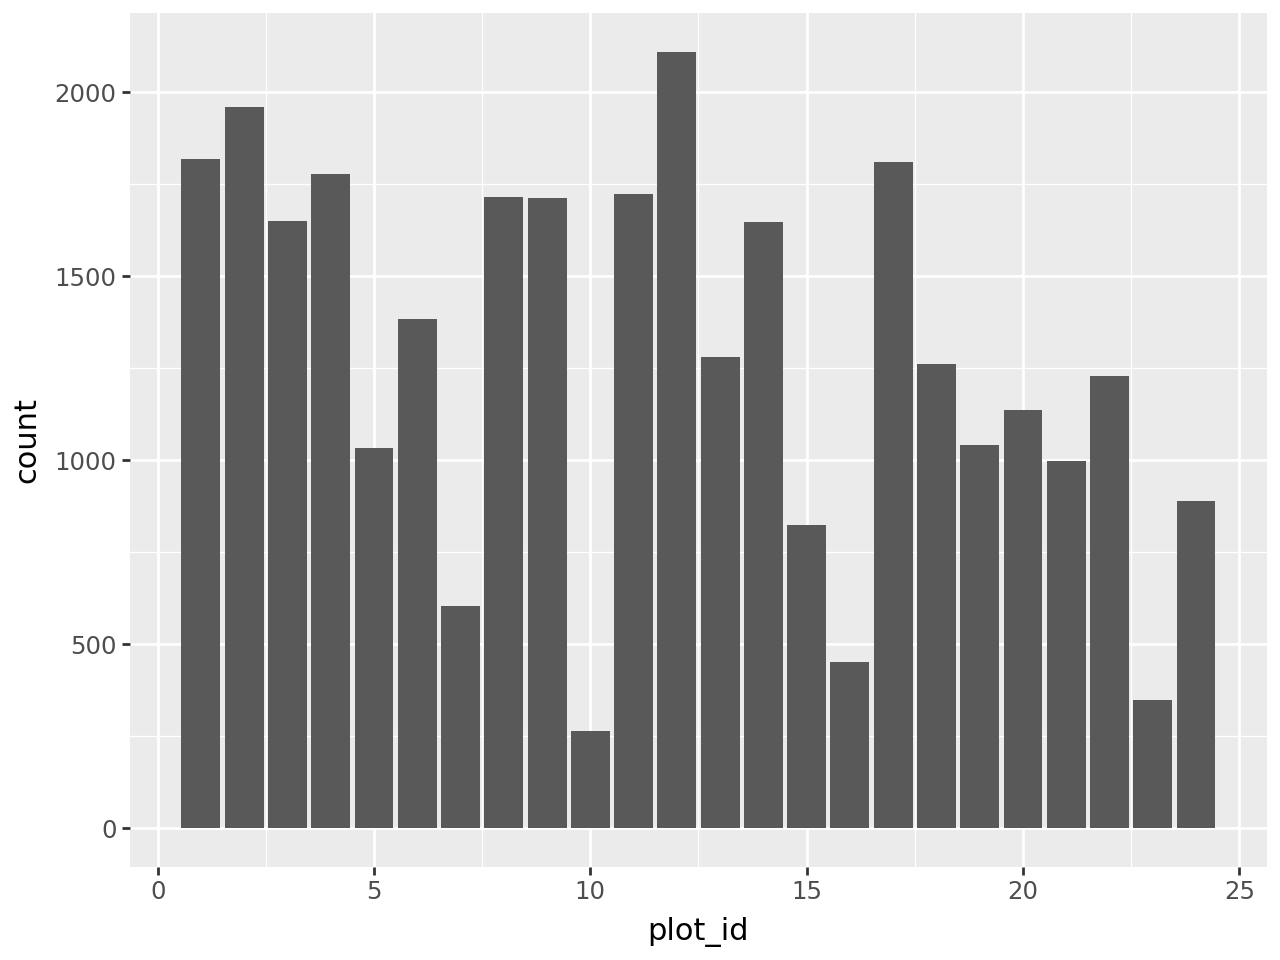

In [3]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id'))
    + p9.geom_bar()
)

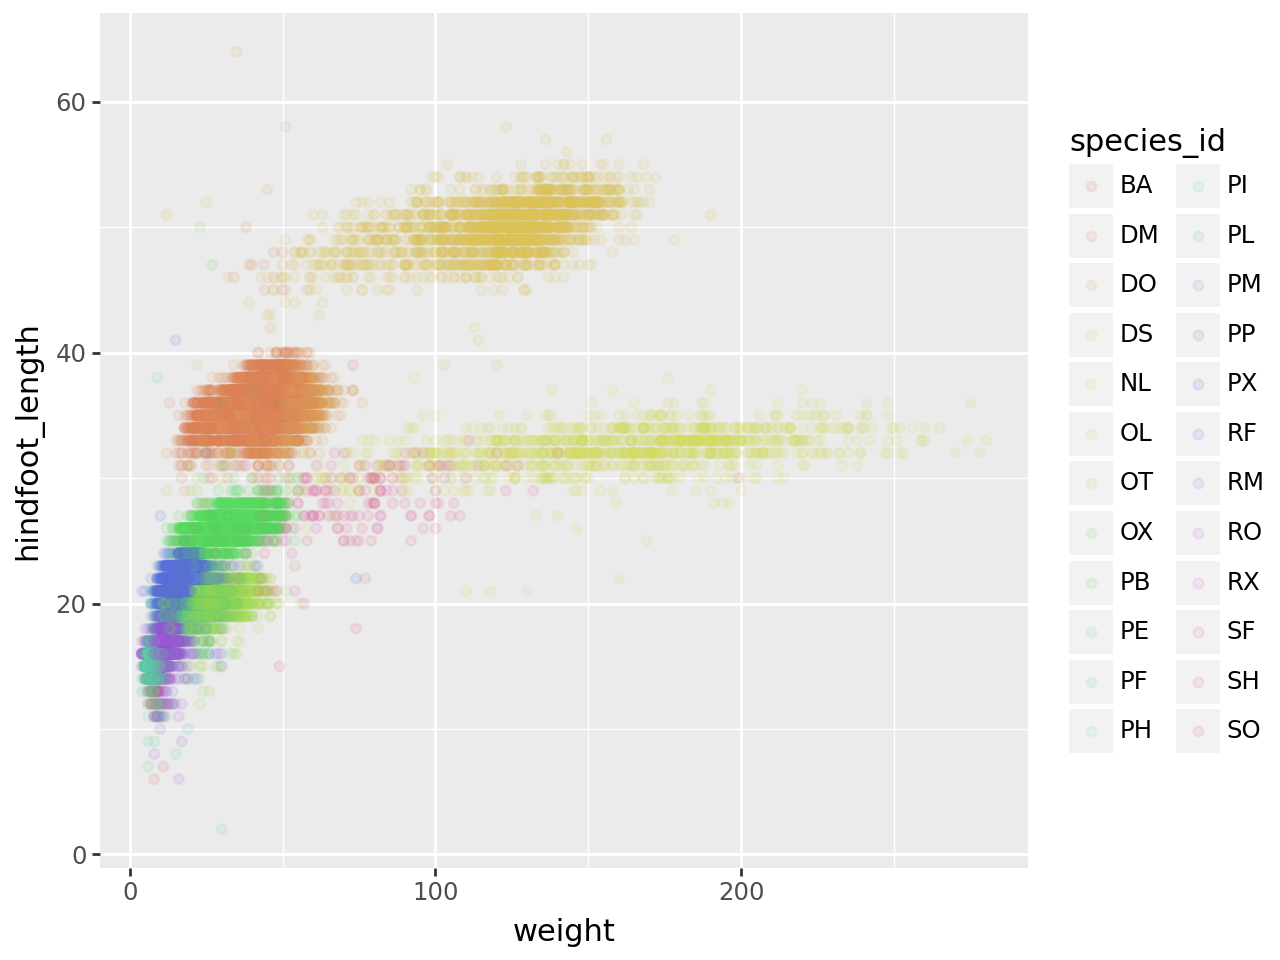

In [4]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
)

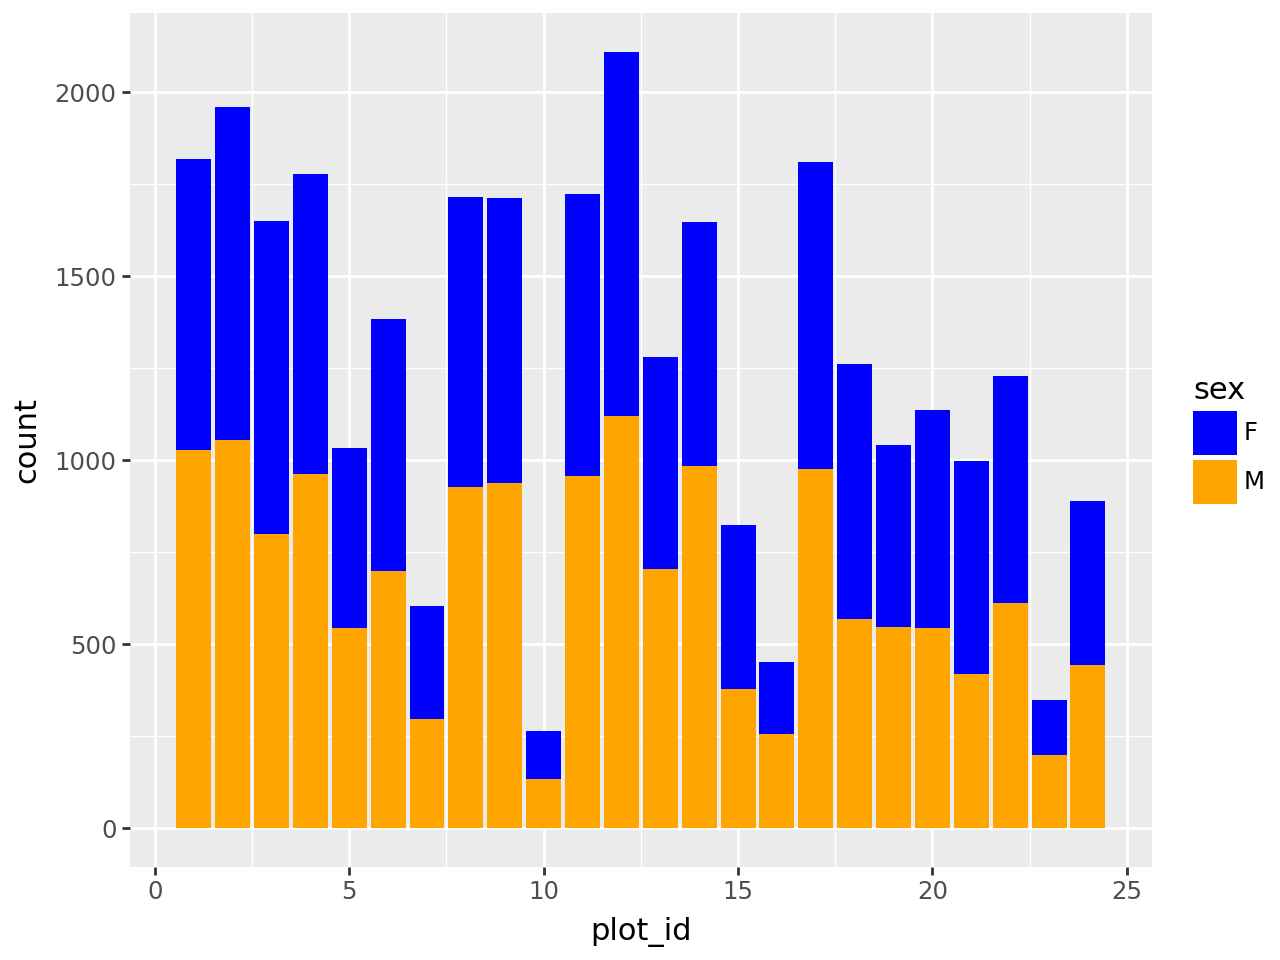

In [5]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id',
                          fill='sex'))
    + p9.geom_bar()
    + p9.scale_fill_manual(["blue", "orange"])
)

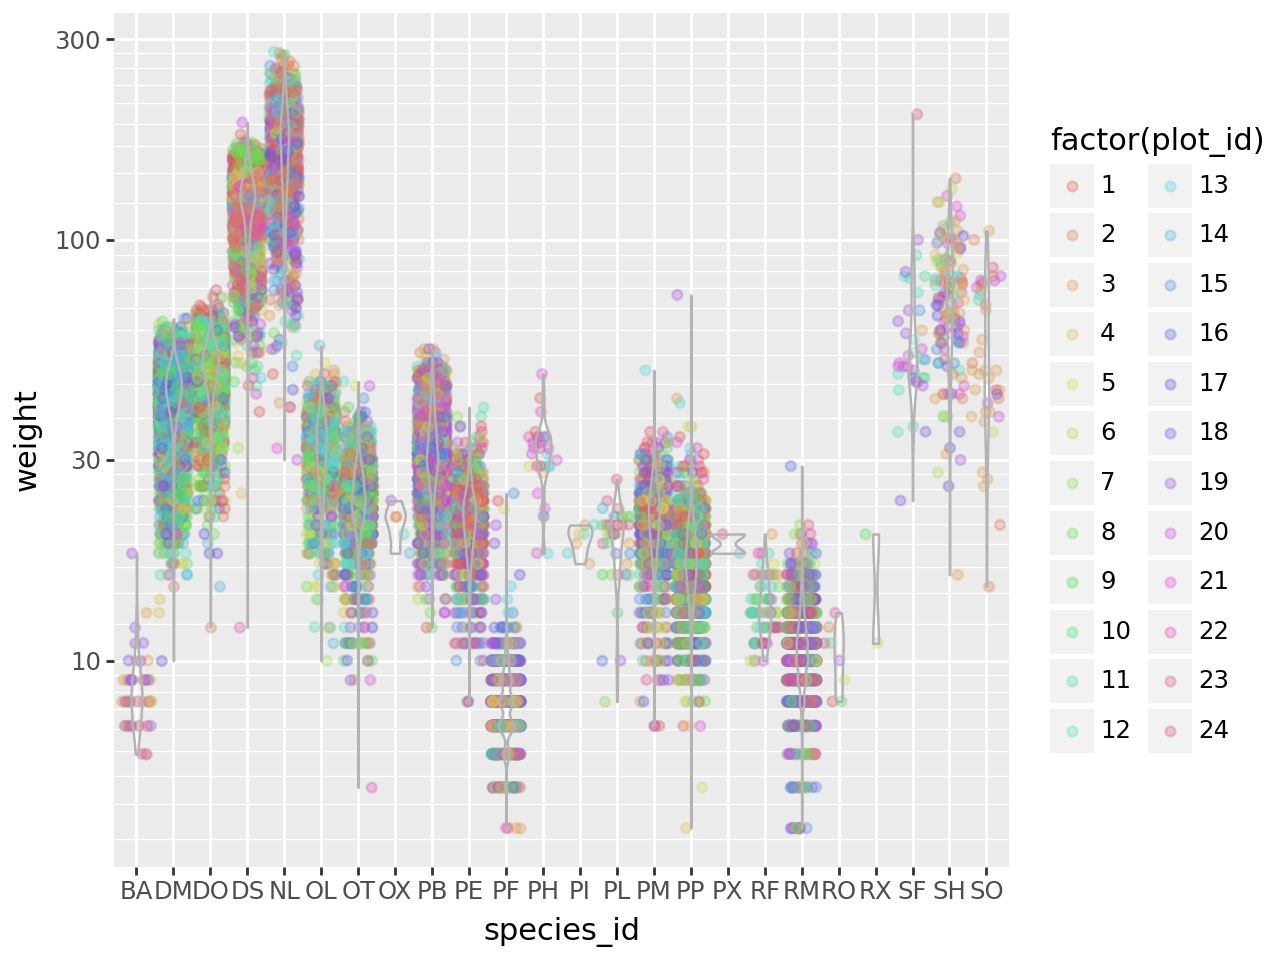

In [6]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight',
                          color='factor(plot_id)'))
    + p9.geom_jitter(alpha=0.3)
    + p9.geom_violin(alpha=0, color="0.7")
    + p9.scale_y_log10()
)

d:\home\EiEddie\Desktop\cwq\env\lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


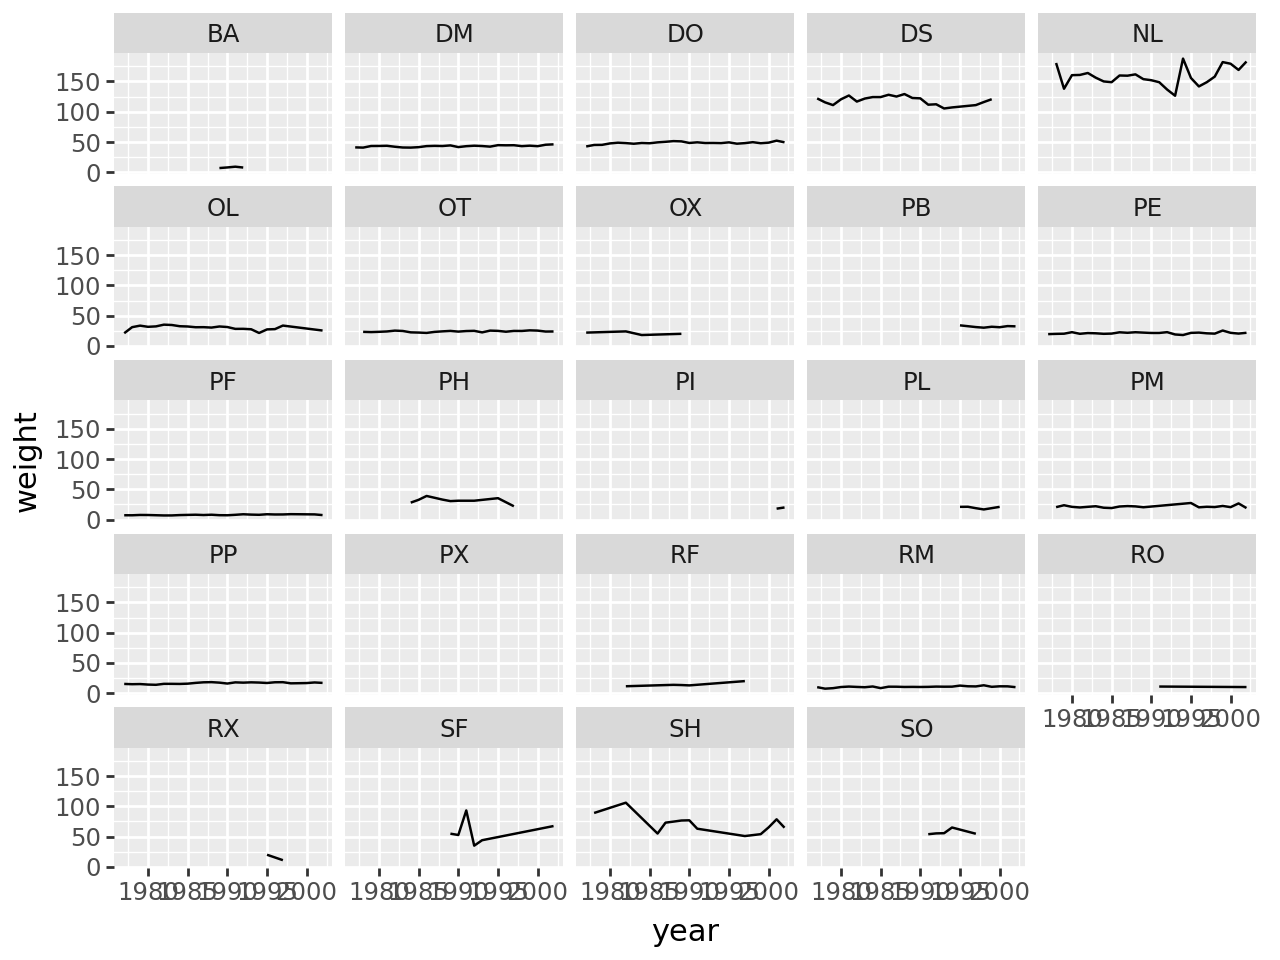

In [7]:
yearly_weight = surveys_complete.groupby(['year', 'species_id'])['weight'].mean().reset_index()
(p9.ggplot(data=yearly_weight, mapping=p9.aes(x='year', y='weight'))
    + p9.geom_line()
    + p9.facet_wrap("species_id")
)

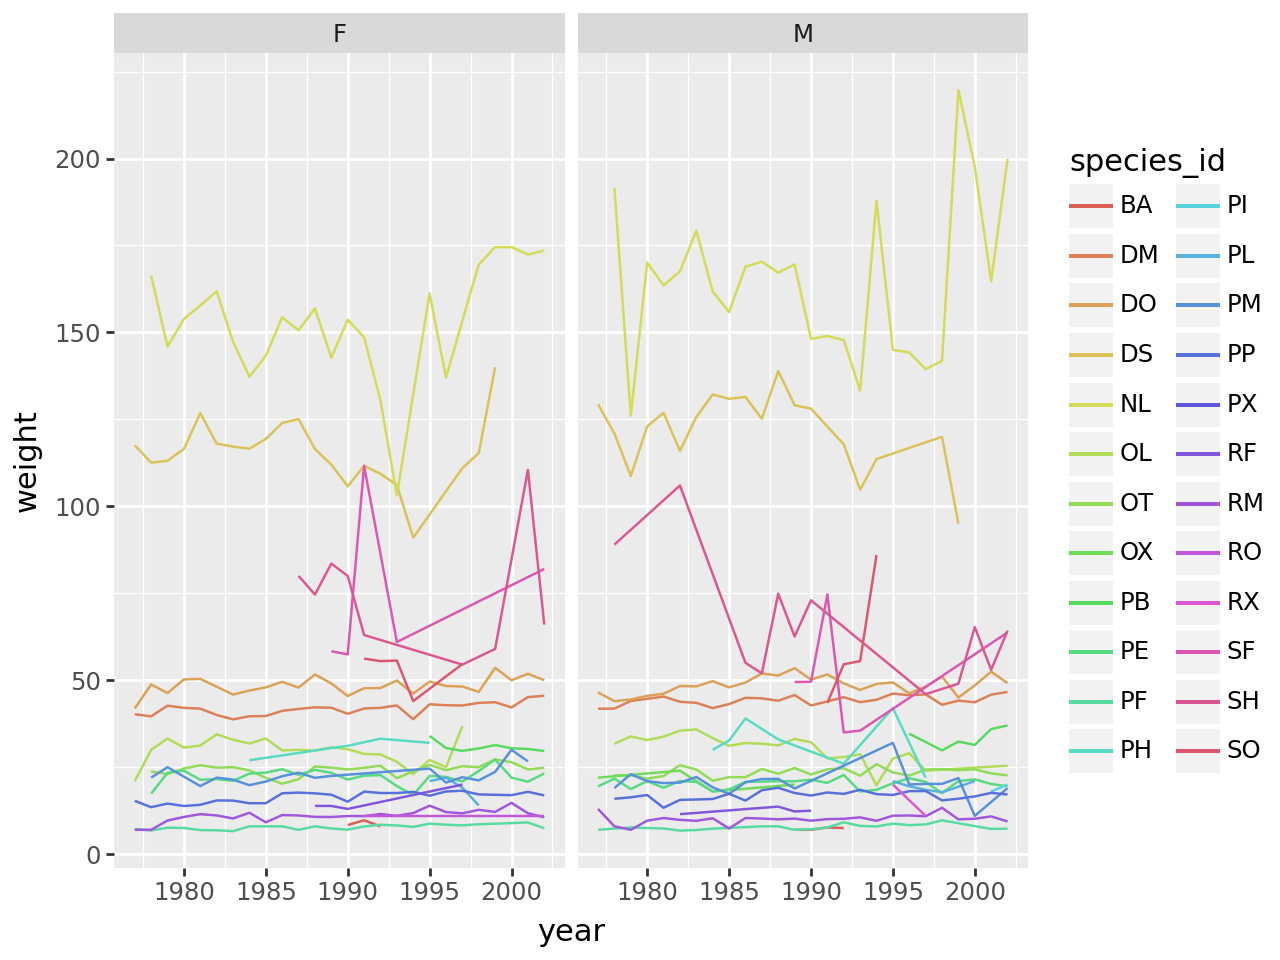

In [8]:
yearly_weight = surveys_complete.groupby(['year', 'species_id', 'sex'])['weight'].mean().reset_index()

(p9.ggplot(data=yearly_weight,
           mapping=p9.aes(x='year',
                          y='weight',
                          color='species_id'))
    + p9.geom_line()
    + p9.facet_wrap("sex")
)